In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost lightgbm catboost

# Load data (use your clean dataset)
df = pd.read_csv('diabetes_cleaned.csv') 

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1 : Logistic Regression

🔹 Logistic Regression Results:
Accuracy: 0.7142857142857143
Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



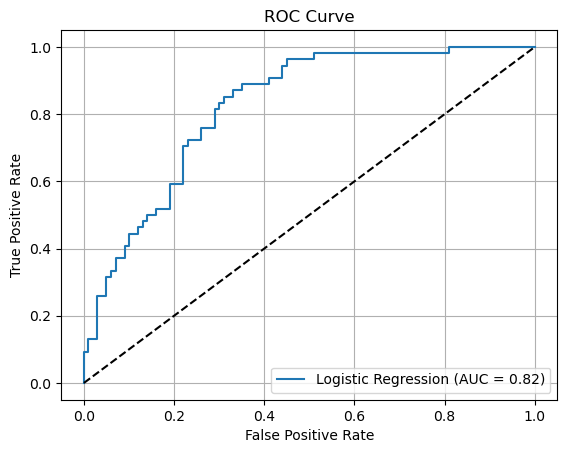

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
y_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


## Model 2: Random Forest

🔹 Random Forest Results:
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[85 15]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



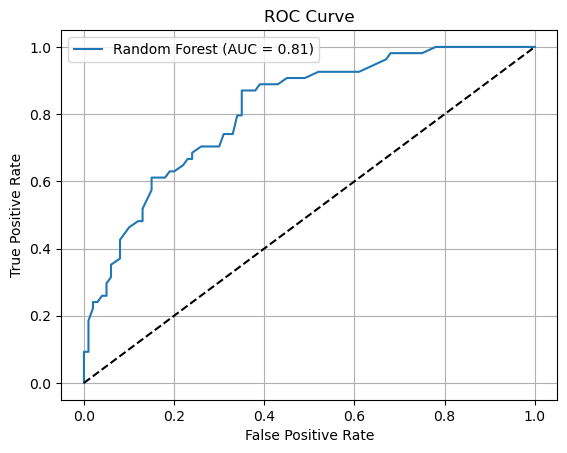

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


## Model 3: Gradient Boosting

🔹 Gradient Boosting Results:
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[84 16]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



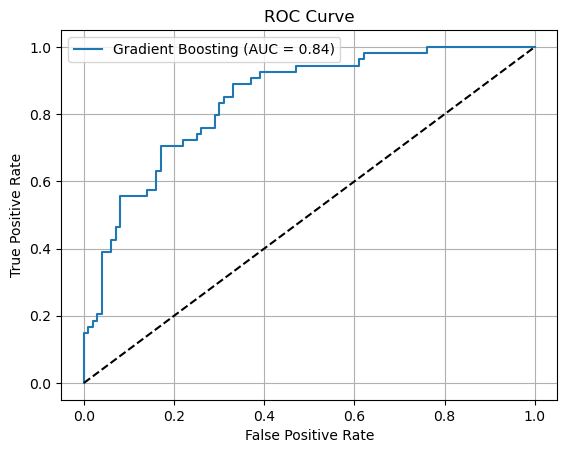

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


##  Model 4: XGBoost

XGBoost Model Evaluation:
[[65 35]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       100
           1       0.57      0.85      0.68        54

    accuracy                           0.72       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.78      0.72      0.73       154



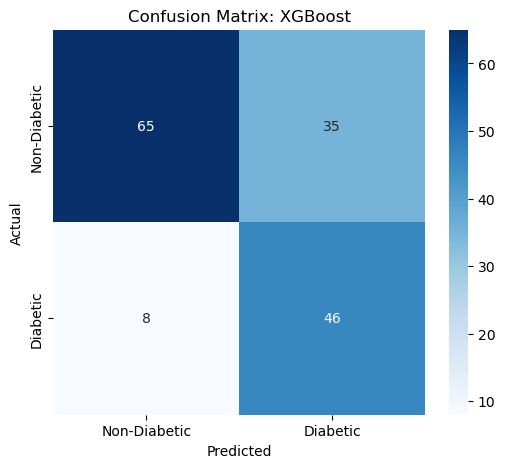

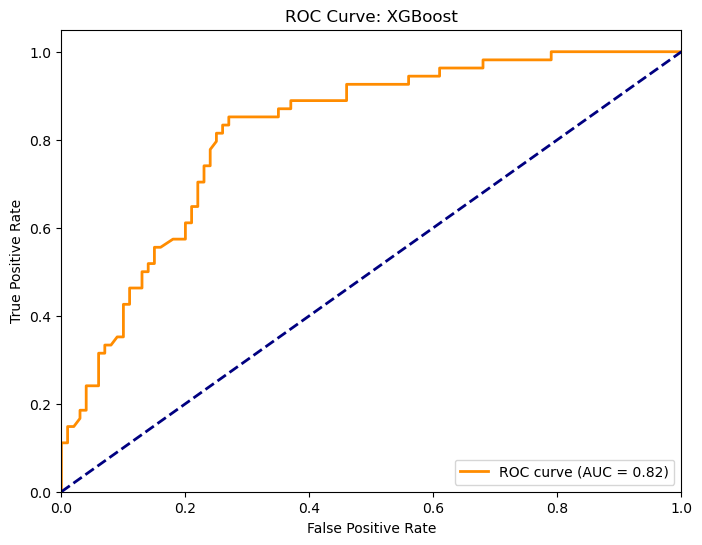

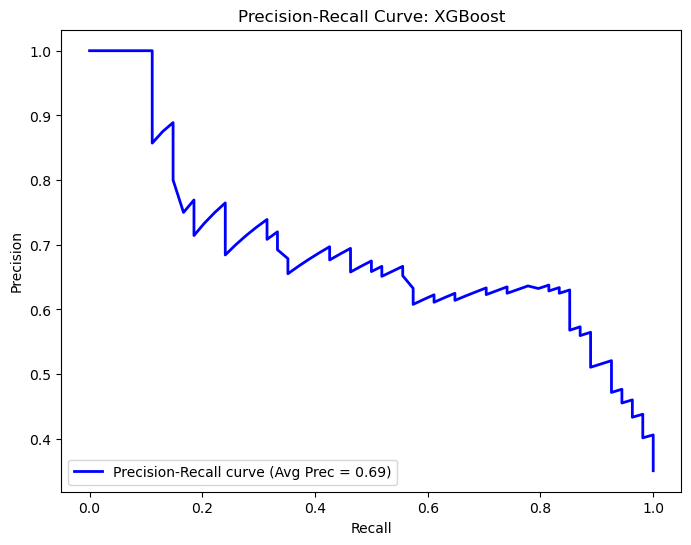

In [34]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, scale_pos_weight=3)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Print Evaluation Metrics
print("XGBoost Model Evaluation:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
prec_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
avg_prec_xgb = average_precision_score(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, prec_xgb, color='b', lw=2, label=f'Precision-Recall curve (Avg Prec = {avg_prec_xgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: XGBoost')
plt.legend(loc='lower left')
plt.show()


## Model 5: LightGBM

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

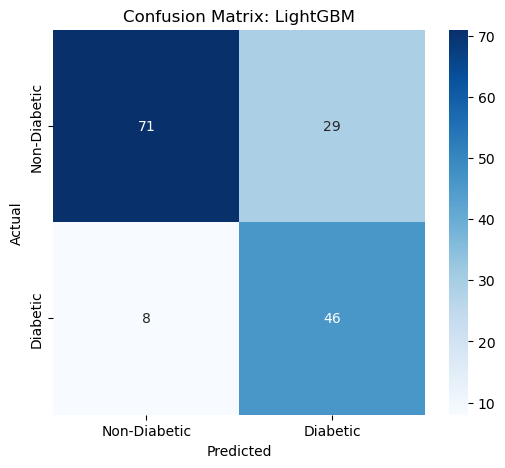

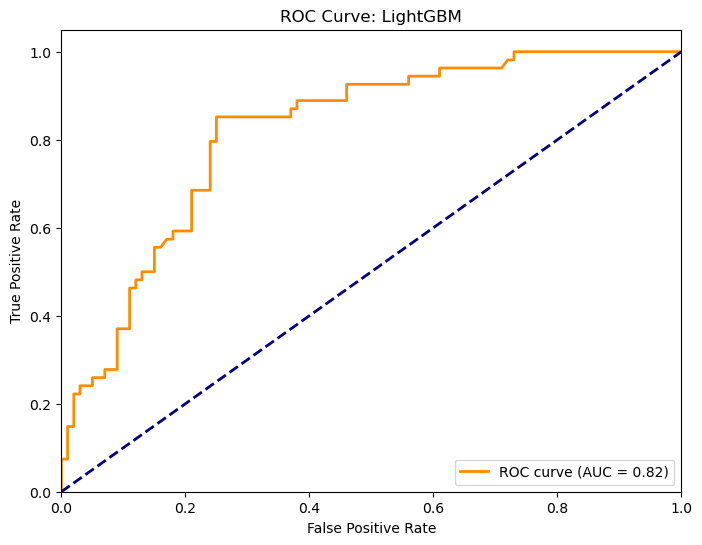

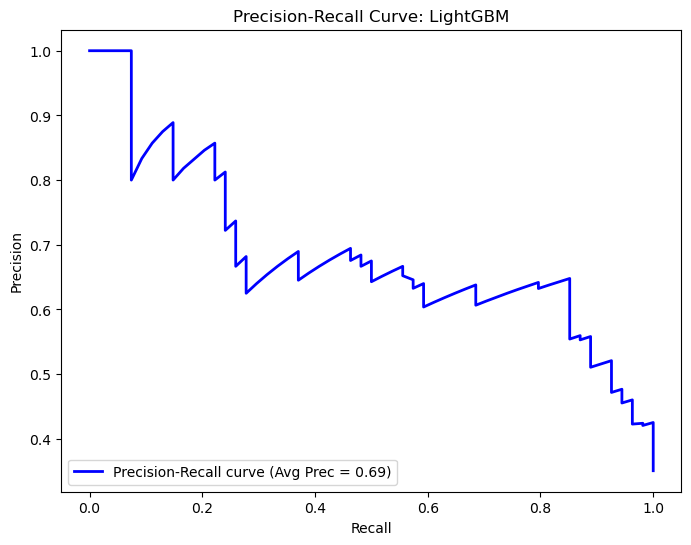

In [36]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, scale_pos_weight=3)

# Fit the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Print Evaluation Metrics
print("LightGBM Model Evaluation:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix: LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LightGBM')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
prec_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_prob_lgb)
avg_prec_lgb = average_precision_score(y_test, y_prob_lgb)
plt.figure(figsize=(8, 6))
plt.plot(recall_lgb, prec_lgb, color='b', lw=2, label=f'Precision-Recall curve (Avg Prec = {avg_prec_lgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: LightGBM')
plt.legend(loc='lower left')
plt.show()


## Model 6: CatBoost

CatBoost Model Evaluation:
[[64 36]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       100
           1       0.57      0.87      0.69        54

    accuracy                           0.72       154
   macro avg       0.73      0.76      0.72       154
weighted avg       0.78      0.72      0.73       154



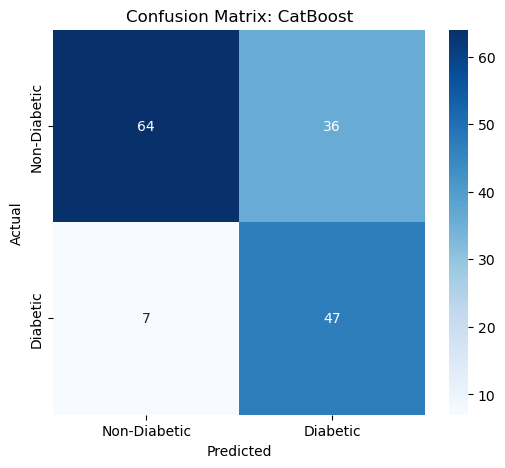

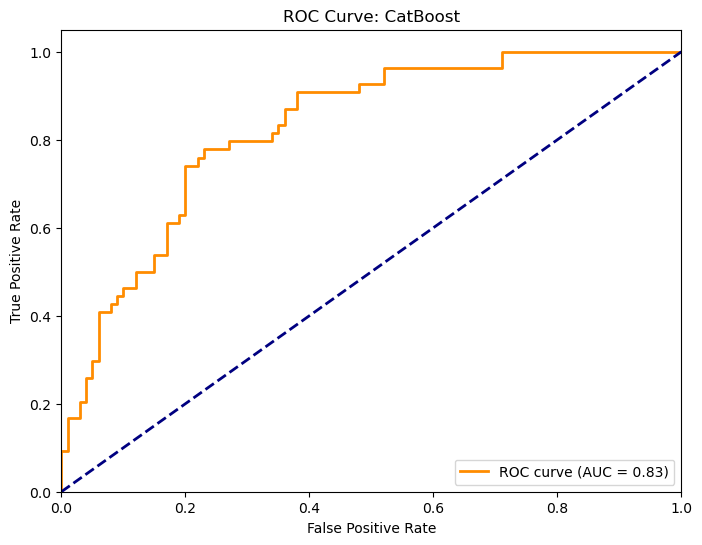

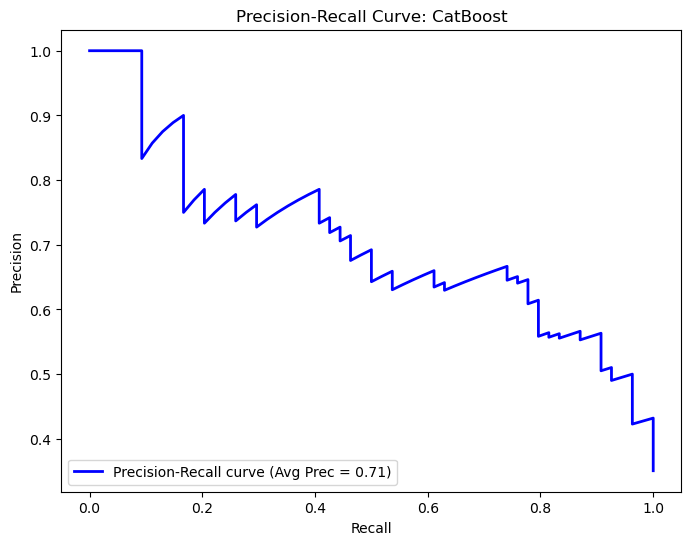

In [38]:
import catboost as cb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize CatBoost model
cat_model = cb.CatBoostClassifier(n_estimators=200, learning_rate=0.01, depth=3, scale_pos_weight=3, silent=True)

# Fit the model
cat_model.fit(X_train, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test)
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Print Evaluation Metrics
print("CatBoost Model Evaluation:")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Confusion Matrix
cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix: CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_cat:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: CatBoost')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
prec_cat, recall_cat, _ = precision_recall_curve(y_test, y_prob_cat)
avg_prec_cat = average_precision_score(y_test, y_prob_cat)
plt.figure(figsize=(8, 6))
plt.plot(recall_cat, prec_cat, color='b', lw=2, label=f'Precision-Recall curve (Avg Prec = {avg_prec_cat:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: CatBoost')
plt.legend(loc='lower left')
plt.show()


In [44]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

# Now, we can train the models again with the resampled data.


Class distribution after SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


In [48]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, scale_pos_weight=3)

# Fit the model with resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Model Evaluation (with SMOTE):")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Model Evaluation (with SMOTE):
[[52 48]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.93      0.52      0.67       100
           1       0.51      0.93      0.66        54

    accuracy                           0.66       154
   macro avg       0.72      0.72      0.66       154
weighted avg       0.78      0.66      0.66       154



In [50]:
import lightgbm as lgb

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, scale_pos_weight=3)

# Fit the model with resampled data
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Model Evaluation (with SMOTE):")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [46]:
from catboost import CatBoostClassifier

# Initialize CatBoost model
catboost_model = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, scale_pos_weight=3, silent=True)

# Fit the model with resampled data
catboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
print("CatBoost Model Evaluation (with SMOTE):")
print(confusion_matrix(y_test, y_pred_catboost))
print(classification_report(y_test, y_pred_catboost))


CatBoost Model Evaluation (with SMOTE):
[[59 41]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       100
           1       0.55      0.93      0.69        54

    accuracy                           0.71       154
   macro avg       0.74      0.76      0.71       154
weighted avg       0.80      0.71      0.71       154



In [52]:
from sklearn.model_selection import cross_val_score

# Cross-validation for CatBoost (tuned model)
cv_scores_catboost = cross_val_score(best_catboost_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores for CatBoost: {cv_scores_catboost}")
print(f"Mean cross-validated score for CatBoost: {cv_scores_catboost.mean()}")

Cross-validated accuracy scores for CatBoost: [0.75974026 0.72077922 0.77922078 0.83660131 0.75163399]
Mean cross-validated score for CatBoost: 0.7695951107715813
